In [ ]:
import numpy as np
from matplotlib import pyplot as plt
import random
import pickle

In [ ]:
def show_image( image_data ): # Used for testing
  im = plt.imshow(image_data, cmap='Greys')
  plt.show()

In [ ]:
def dynamics(x_t, u_t): # Returns x_t+1
  A = np.array([[1.0, 1.0], [0.0, 1.0]])
  B = np.array([[0.0], [1.0]])
  Ax_t = np.matmul(A, x_t)
  Bu_t = B * u_t

  return np.add(Ax_t, Bu_t)

In [ ]:
def collect_data( x_t1, u_list, times, cur_list ): # Collects x's given x_t1, list of u_t, and number of times to calculate
    cur_x = x_t1
    x_list = [cur_x]
    for i in range(times):
        next_x = dynamics(cur_x, u_list[i])
        pos = next_x[0][0]

        if pos >= 99:
          next_x[0][0] = 99
          x_list.append(next_x)
          next_x[0][0] = random.randint(10, 90)
        elif pos < 0:
          next_x[0][0] = 0
          x_list.append(next_x)
          next_x[0][0] = random.randint(10, 90)
        else:
          x_list.append(next_x)
        cur_x = next_x

    cur_list += x_list

In [ ]:
def create_u_list( times ): # Creates list of u_t for testing given number of u's to create
    u_list = []
    for i in range(times):
        u = random.uniform(-1, 1)
        u_list.append(np.array([[u]]))

    return u_list

In [ ]:
def add_car( image_data, start_column, start_row ): # Adds car to image data
    color = .7 # Change color of the car body
    total_col, total_row = image_data.shape
    start_column = int(start_column)
    start_row = int(start_row)

    if start_row + 2 >= total_row:
        start_row = 97

    if start_row - 1 < 0:
        start_row = 1

    if start_column + 2 >= total_col:
        start_column = 94

    if start_column - 5 < 0:
        start_column = 5

    # Main body
    image_data[start_row: start_row + 2, start_column - 5: start_column + 5] = color
    image_data[start_row - 1, start_column - 3: start_column + 3] = color

    # Wheels
    image_data[start_row + 2, start_column - 3] = 1
    image_data[start_row + 2, start_column + 2] = 1

In [ ]:
def image_noise( image_data ):
  for i in range(100):
    for j in range(100):
      image_data[i, j] += random.uniform(-.1, .1)

In [ ]:
def road_noise( image_data ):
  for i in range(35, 65):
    for j in range(100):
      image_data[i, j] += random.uniform(-.1, .1)

In [ ]:
def top_grass_noise( image_data ):
  for i in range(35):
    for j in range(100):
      image_data[i, j] += random.uniform(-.1, .1)

In [ ]:
def bottom_grass_noise( image_data ):
  for i in range(65, 100):
    for j in range(100):
      image_data[i, j] += random.uniform(-.1, .1)

In [ ]:
def create_image():

  M = np.zeros((100,100))
  num_rows = np.shape(M)[0]
  num_columns = np.shape(M)[1]

  # create road and grass
  M[:35] = 0.05
  M[35: 65] = 0.3
  M[65: ] = 0.05
  for i in range(0, 100, 10):
    M[49: 52, i: i + 5] = 0

  # top rows
  for i in range(0, num_rows):
    M[0:3, i] = 0.4 * (random.randint(1, 2))

  # bottom rows
  for i in range(0, num_rows):
    M[num_rows - 3: num_rows, i] = 0.4 * (random.randint(1, 2))

  # left rows
  for i in range(0, num_columns):
    M[i, 0:3] = 0.4 * (random.randint(1, 2))

  # right rows
  for i in range(0, num_columns):
    M[i, num_columns - 3: num_columns] = 0.4 * (random.randint(1, 2))

  # random 7x7 blocks
  block_row_start = random.choice([random.randint(0, 28), random.randint(65, 92)])
  block_column_start = random.randint(0, 92)
  M[block_row_start: block_row_start + 7, block_column_start: block_column_start + 7] = 0.8

  # random trees
  for i in range(random.randint(20, 30)):
    block_row_start = random.choice([random.randint(0, 28), random.randint(65, 92)])
    block_column_start = random.randint(0, 92)
    M[block_row_start: block_row_start + 3, block_column_start: block_column_start + 3] = 0.1 * random.randint(3, 6)
    M[block_row_start + 3: block_row_start + 5, block_column_start + 1] = .7

  # sine pebbles
  pebble_start = random.randint(0, 80)
  for i in range(0, 100, 5):
    M[int(pebble_start * np.sin(i)), i] = .1 * random.randint(4, 6)

  return M

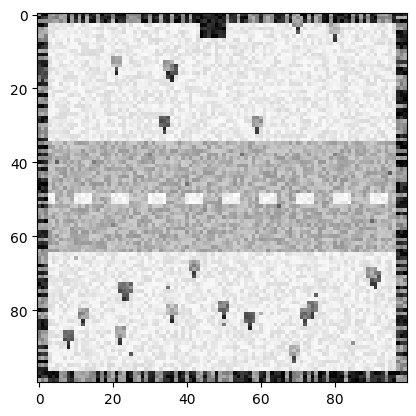

In [ ]:
image_data = create_image()
image_noise(image_data)
plt.imshow(image_data, cmap='Greys')

In [ ]:
# save as numpy array
# we need at least 100,000 images
# save the list as a pickle
# randomized image, but car's path has meaning

def generate_image_set( x_data ):
    file_name = "/content/car_images/Car{}.png"
    image_data = create_image()
    image_list = []

    for i in range(len(x_data)):

      image_data = create_image()
      temp_image = np.copy(image_data)

      car_column = int(x_data[i][0])
      car_row = random.randint(40, 60)
      add_car(temp_image, car_column, car_row)
      image_list.append(temp_image)

    return image_list

      # im = plt.imshow(temp_image, cmap='Greys')
      # plt.savefig(file_name.replace("{}", str(i)))

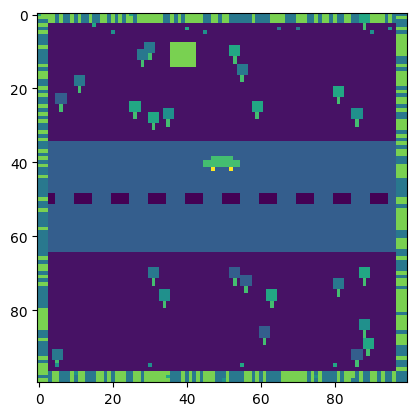

In [ ]:
list_position = [np.array([[1.],[1.]]), np.array([[10.],[1.]]), np.array([[50.],[1.]])]
set1 = generate_image_set(list_position)
plt.imshow(set1[2])

Total Images: 500


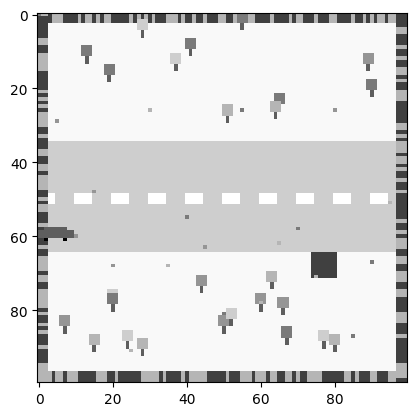

In [ ]:
#times = 99
#total_image_factor = 100
times = 49
total_image_factor = 10
u_list = create_u_list(times)
x_t1 = np.array([[0.],[1.]])
x_data = []

for i in range(total_image_factor):
  collect_data(x_t1, u_list, times, x_data)
  x_t1 = x_data[-1]

image_list = generate_image_set(x_data)
im = plt.imshow(image_list[-1], cmap='Greys')
print(f"Total Images: {len(image_list)}")
plt.show()
#image_data = create_image()

Arrays pickled.

Arrays unpickled:
Total Images: 500


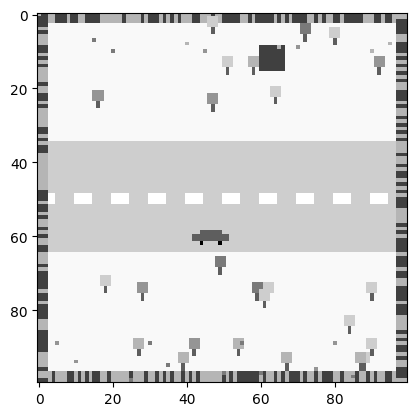

In [ ]:
with open('arrays.pkl', 'wb') as f:
    pickle.dump(image_list, f)

print("Arrays pickled.")

with open('arrays.pkl', 'rb') as f:
    image_list = pickle.load(f)

print("\nArrays unpickled:")
im = plt.imshow(image_list[-1], cmap='Greys')
print(f"Total Images: {len(image_list)}")
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split

#print(x_data)
(trainX, testX, trainY, testY) = train_test_split(image_list, x_data, test_size=.15, random_state=42)
print(len(trainX))
print(len(trainY))
print(len(testX))
print(len(testY))

425
425
75
75


In [ ]:
trainX = np.array(trainX)
trainY = np.array(trainY)
testX = np.array(testX)
testY = np.array(testY)
print(trainX.shape)
print(trainY.shape)
print(testX.shape)
print(testY.shape)
print(type(trainY))

(425, 100, 100)
(425, 2, 1)
(75, 100, 100)
(75, 2, 1)
<class 'numpy.ndarray'>


In [ ]:
#trainX = trainX.reshape(8500, 100, 100, 1)
#testX = testX.reshape(1500, 100, 100, 1)
trainX = trainX.reshape(425, 100, 100, 1)
testX = testX.reshape(75, 100, 100, 1)

In [ ]:
tmpY = np.zeros(trainY.shape[0])
print(trainY.shape)
for i in range(trainY.shape[0]):
  tmpY[i] = trainY[i][0]
trainY = tmpY
print(trainY.shape)

tmpY = np.zeros(testY.shape[0])
print(testY.shape)
for i in range(testY.shape[0]):
  tmpY[i] = testY[i][0]
testY = tmpY
print(testY.shape)

(425, 2, 1)
(425,)
(75, 2, 1)
(75,)


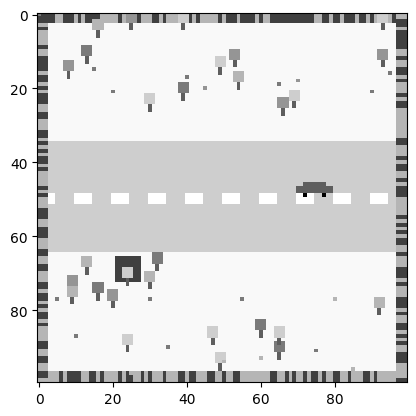

In [ ]:
%matplotlib inline
plt.figure()
plt.imshow(trainX[2], cmap="Greys")
plt.grid(False)
plt.show()

In [ ]:
import tensorflow as tf
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Flatten, Activation, MaxPooling2D, SeparableConv2D

def cnn():
    #reshape data to fit model

    #create model
    model = Sequential()
    inputShape = (100, 100, 1)

    #add model layers
    model.add(Conv2D(64, kernel_size=3, activation = "relu", input_shape=inputShape))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Activation("relu"))

    model.add(SeparableConv2D(32, (3, 3), padding="same"))
    model.add(Activation("relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    model.add(Conv2D(64, kernel_size=3, activation="relu"))
    model.add(MaxPooling2D(pool_size=(4, 4)))
    model.add(Activation("relu"))
    model.add(Flatten())

    model.add(Dense(1, activation="softmax"))

    return model

In [ ]:
def cnn_regression():
    # create model
    model = Sequential()
    inputShape = (100, 100, 1)

    # add model layers
    model.add(Conv2D(32, kernel_size= 3, activation="relu", input_shape=inputShape))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size= 3, activation="relu"))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Flatten())

    # Output layer for regression with a single unit and linear activation
    model.add(Dense(1, activation='linear'))

    return model

model = cnn_regression()
NUM_EPOCHS = 100

model.compile(optimizer='adam', loss='mean_squared_error')

# Implement early stopping based on validation loss.
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,
    restore_best_weights=True
)

H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=NUM_EPOCHS, callbacks=[early_stopping])

Epoch 1/100
14/14 [==============================] - 8s 510ms/step - loss: 911.9194 - val_loss: 731.5312
Epoch 2/100
14/14 [==============================] - 6s 415ms/step - loss: 678.3568 - val_loss: 662.8211
Epoch 3/100
14/14 [==============================] - 7s 484ms/step - loss: 556.5936 - val_loss: 651.6682
Epoch 4/100
14/14 [==============================] - 6s 427ms/step - loss: 522.3793 - val_loss: 596.7011
Epoch 5/100
14/14 [==============================] - 7s 495ms/step - loss: 475.3529 - val_loss: 547.5109
Epoch 6/100
14/14 [==============================] - 6s 431ms/step - loss: 401.1208 - val_loss: 473.5575
Epoch 7/100
14/14 [==============================] - 7s 497ms/step - loss: 280.9180 - val_loss: 316.0857
Epoch 8/100
14/14 [==============================] - 6s 430ms/step - loss: 154.3043 - val_loss: 222.3183
Epoch 9/100
14/14 [==============================] - 9s 644ms/step - loss: 104.7972 - val_loss: 146.6438
Epoch 10/100
14/14 [==============================] - 6

In [ ]:
model.save("/content/FSRImodel1.h5")
print("Saved model to drive")

Saved model to drive


In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 98, 98, 32)        320       
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 49, 49, 32)       0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 47, 47, 64)        18496     
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 23, 23, 64)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 33856)             0         
                                                                 
 dense_2 (Dense)             (None, 1)                

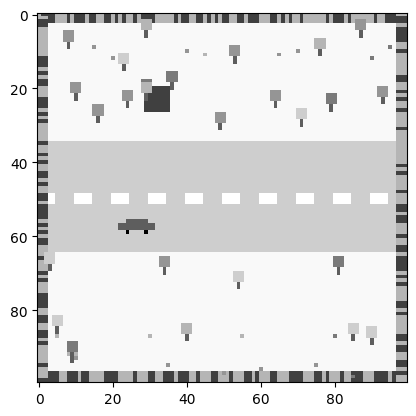

1/1 [==============================] - 0s 81ms/step
[[26.81708]]
27.006158756269635


In [ ]:
img = testX[0]
%matplotlib inline
plt.figure()
plt.imshow(testX[0], cmap="Greys")
plt.grid(False)
plt.show()
print(model.predict(np.expand_dims(img, axis=0)))
print(testY[0])

In [ ]:
model = cnn()
NUM_EPOCHS = 50

# optimizer = keras.optimizers.Adam(learning_rate=0.1)
model.compile(optimizer='adam',loss='mean_squared_error')

trainX = (trainX - trainX.mean()) / trainX.std()
testX = (testX - testX.mean()) / testX.std()
#model.fit(trainX,trainY)

# Implement early stopping based on validation loss.
early_stopping = keras.callbacks.EarlyStopping(
    monitor='val_loss',
    patience=10,  # Adjust this based on your training needs.
    restore_best_weights=True
)

H = model.fit(trainX, trainY, validation_data=(testX, testY), epochs=NUM_EPOCHS, callbacks=[early_stopping])
# H = model.fit(trainX, trainY, validation_data=(np.array(testX), np.array(testY)), epochs=NUM_EPOCHS)

#model.fit(train_data, epochs=10, validation_data=valid_data)

Epoch 1/50
14/14 [==============================] - 7s 423ms/step - loss: 1647.8420 - val_loss: 1834.5463
Epoch 2/50
14/14 [==============================] - 4s 317ms/step - loss: 1647.8420 - val_loss: 1834.5463
Epoch 3/50
14/14 [==============================] - 4s 313ms/step - loss: 1647.8422 - val_loss: 1834.5463
Epoch 4/50
14/14 [==============================] - 6s 419ms/step - loss: 1647.8420 - val_loss: 1834.5463
Epoch 5/50
14/14 [==============================] - 4s 314ms/step - loss: 1647.8422 - val_loss: 1834.5463
Epoch 6/50
14/14 [==============================] - 5s 371ms/step - loss: 1647.8419 - val_loss: 1834.5463
Epoch 7/50
14/14 [==============================] - 5s 339ms/step - loss: 1647.8422 - val_loss: 1834.5463
Epoch 8/50
14/14 [==============================] - 4s 313ms/step - loss: 1647.8420 - val_loss: 1834.5463
Epoch 9/50
14/14 [==============================] - 6s 421ms/step - loss: 1647.8422 - val_loss: 1834.5463
Epoch 10/50
14/14 [===========================

In [ ]:
from keras.models import load_model
model = load_model('FSRImodel1.h5')

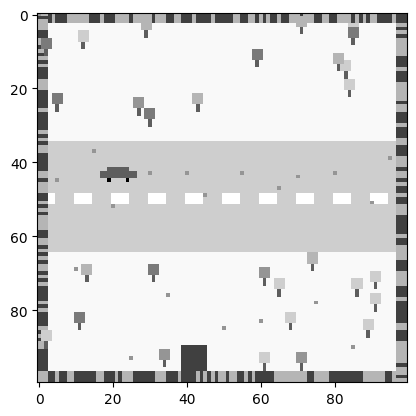

<Figure size 640x480 with 0 Axes>

In [ ]:
# --------------- Testing ----------------
x_final_t = x_data[-1]
image_data = create_image(x_final_t)

# place car
car_column = int(x_final_t[0])
car_row = random.randint(40, 60)
add_car(image_data, car_column, car_row)
# show_image(image_data)
im = plt.imshow(image_data, cmap='Greys')
plt.savefig("yes.png")
plt.show()
# ----------------------------------------

In [ ]:
def cnn():






In [ ]:
def create_pixelated_image(x_final_t): # I'm assuming x_final_t is a 2x1 matrix
  M = np.zeros((100,100))
  num_rows = np.shape(M)[0]
  num_columns = np.shape(M)[1]

  #splitting rows
  for i in range(4, 50):
    M[i, i - 1] = 1

  j = 50
  while j >= 4:
    for i in range(46, 75):
      M[i, j] = 1
      j -= 1

  #j = 67
  #while j <= 80:
    #for i in range(20, 40):
      #M[i, j] = 1
      #j += 1

  M[73, 22:] = 1
  # top rows
  for i in range(0, num_rows):
    M[0:3, i] = 0.4 * (random.randint(1, 2))

  # bottom rows
  for i in range(0, num_rows):
    M[num_rows - 3: num_rows, i] = 0.4 * (random.randint(1, 2))

  # left rows
  for i in range(0, num_columns):
    M[i, 0:3] = 0.4 * (random.randint(1, 2))

  # right rows
  for i in range(0, num_columns):
    M[i, num_columns - 3: num_columns] = 0.4 * (random.randint(1, 2))

  # block of sun in the right corner
  for i in range(3, 11):
    M[i, num_columns - 13: num_columns - 4] = 0.4

  add_car(M, x_final_t[0], 80)

  return M

[[0.4 0.4 0.4 ... 0.4 0.4 0.4]
 [0.8 0.8 0.8 ... 0.4 0.4 0.4]
 [0.4 0.4 0.4 ... 0.8 0.8 0.8]
 ...
 [0.8 0.8 0.8 ... 0.4 0.4 0.4]
 [0.4 0.4 0.4 ... 0.4 0.4 0.4]
 [0.8 0.8 0.8 ... 0.8 0.8 0.8]]


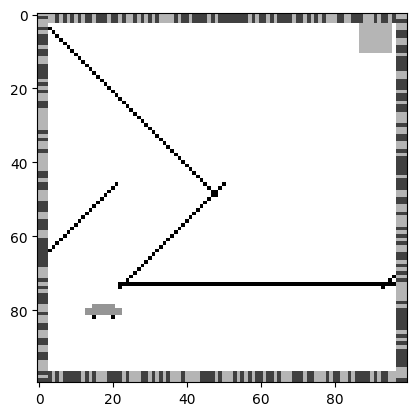

In [ ]:
# right now not dependent on position value
x_final_t = x_data[-1]
#print(x_final_t)
image = create_pixelated_image(x_final_t)
show_image(image)

In [ ]:
  # implementing a (dirty) sine wave function for the matrix. (dirty) means that we are giving different values from 0.4 to 0.6 within the sine wave
"""
  print(int(x_final_t[0][0]), int(np.sin(x_final_t[0][0]) + 49))
  for i in range(0, num_rows):

    M[int(x_final_t[0][0]), int(np.sin(x_final_t[0][0]) + 49)] = 1

  # implementing a (dirty) cosine wave function for the matrix. (dirty) means that we are giving different values from 0.1 to 0.3 within the cosine wave
  for i in range(0, num_rows):
    M[x_final_t[0], np.cos(x_final_t) + 40] = 0.1 * (random.randint(1, 3))

  # implementing a (dirty) dust generator the generates 100 random dirt specs on the matrix lol
  for i in range(0, 100):
    M[random.randint(0, 99), random.randint(0, 99)] = 0.1 * (random.randint(0, 10))


  # start_row is the y value (middle of the road) that the car should be located at
  add_car(M, x_final_t[0], start_row) # I don't know what to put here for start_row...
"""
  # failed sine road
  #sine_wave = 50 * np.sin(np.linspace(0, 2*np.pi, 100)) + 50  #create sine wave
  #M[45: 65, :] = sine_wave.astype(int)  # 11th row

  # failed sine road
  # the sine gradient row
 #for i in range(45, 60):
   # sine_wave = 0.05 * np.sin(np.linspace(-2*np.pi, 2*np.pi, 100)) + 5 #create sine wave
    #M[i, :] = sine_wave.astype(int)

  # failed sine road
  #sin_value = 25 * np.sin(np.linspace(0, 2*np.pi, 100)) + 25
  #M[, int(sin_value)] = 1